### Dimensionality Reduction, Reconstructing Turkey Map with MDS, PCA to Time Series Data
Dimensionality Reduction is any method that transforms a high dimensional data to lower dimensions. It is harder to perform computations and interpretations with a high dimensional data than lower dimensional data. Although one may loose some part of information with the usage of dimensionality reduction, it may still be worth to reduce the dimensionality in order to do computations and interpretations easier. In this project we will use the dimensionality reduction methods on several datasets.
                                                                                                               
                                                                                                               Alperen Köksal

In [1]:
#Required Libraries
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.spatial import distance
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

## Task 1 – Dimensionality reduction

In [2]:
dat = pd.read_csv("C:/Users/a_kok/Desktop/Dersler/IE 582/HW2/IE582_Fall21_HW2_q1_data.csv")

Our first dataset belong to a classification problem where we have only two class named a and b.

In [3]:
dat["colors"] = dat["class"].apply(lambda x: "red" if x == "a" else "blue")
dat.head()

,X1,X2,class,colors
0,0.569483,0.822003,a,red
1,0.411469,0.911424,a,red
2,0.417385,-0.908730,a,red
3,-0.791828,0.610745,a,red
4,-0.806777,-0.590857,a,red


This is the basic presentation of data points corresponding to their classes.

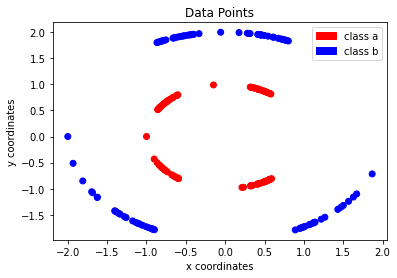

In [4]:
#lev=as.numeric(dat[,3])
#plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
#legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dat.iloc[:,0],
          dat.iloc[:,1],
          color = dat.iloc[:,3])
ax.set(title= "Data Points",
      xlabel = "x coordinates",
      ylabel = "y coordinates")
red_patch = mpatches.Patch(color='red', label='class a')
blue_patch = mpatches.Patch(color='blue', label='class b')
ax.legend(handles = [red_patch,blue_patch])

plt.show()


#### a) 
We want to use principal component analysis with one component on this dataset to see whether we still have some important information about data or not. Although we set n_components 2 here, we only use first component.

In [5]:
features = ["X1","X2"]

# Separating out the features
x = dat.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])




In [6]:
principalDf.head()

,principal component 1,principal component 2
0,-0.962534,0.198197
1,-0.875865,0.016792
2,0.083294,0.985987
3,0.304123,-0.844643
4,0.953320,-0.220808


As we see with the first component we can explain the %50 of total variation in dataset only.

In [7]:
pca.explained_variance_ratio_.cumsum()

array([0.50044248, 1.        ])

It is now easier to present datapoints and still we can distingiush classes from each other somewhat but not too precise as before because we lost %50 of the variation while using pca.

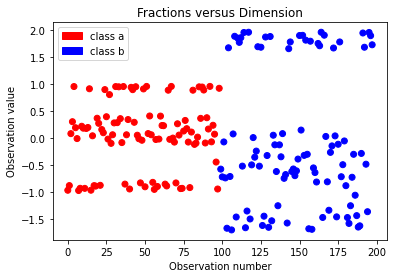

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(0,len(dat))),
          principalDf.iloc[:,0],
          color = dat.iloc[:,3])
ax.set(title= "Fractions versus Dimension",
      xlabel = "Observation number",
      ylabel = "Observation value")
red_patch = mpatches.Patch(color='red', label='class a')
blue_patch = mpatches.Patch(color='blue', label='class b')
ax.legend(handles = [red_patch,blue_patch])

plt.show()

#### b) 
Now we want to use multi dimensional scaling method to reduce the dimensionality of previous dataset

In [9]:
dist_euclidean = pairwise_distances(x,metric = "euclidean")
mds = MDS(n_components = 1,dissimilarity='precomputed', random_state=0)
x_mds_euclidean = mds.fit_transform(dist_euclidean)

In this one, we used euclidean distance as similarity measure. We still lost some information, but one can easily observe that with this method we can distinguish classes of points from each other more precise with mds method than pca method

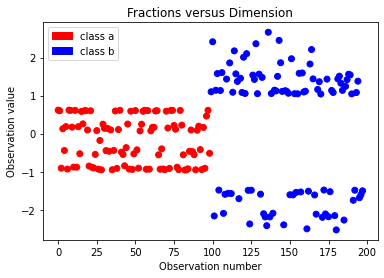

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(0,len(dat))),
          x_mds_euclidean[:,0],
          color = dat.iloc[:,3])
ax.set(title= "Fractions versus Dimension",
      xlabel = "Observation number",
      ylabel = "Observation value")
red_patch = mpatches.Patch(color='red', label='class a')
blue_patch = mpatches.Patch(color='blue', label='class b')
ax.legend(handles = [red_patch,blue_patch])

plt.show()

In [11]:
dist_euclidean = pairwise_distances(x,metric = "chebyshev")
mds = MDS(n_components = 1,dissimilarity='precomputed', random_state=0)
x_mds_chebyshev = mds.fit_transform(dist_euclidean)

In this one, we used multidimensional scaling method with chebyshev distance. It seems worse than euclidean distance multidimensional scaling method because some points are in the range of other class.

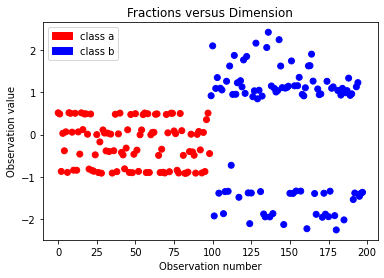

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(0,len(dat))),
          x_mds_chebyshev[:,0],
          color = dat.iloc[:,3])
ax.set(title= "Fractions versus Dimension",
      xlabel = "Observation number",
      ylabel = "Observation value")
red_patch = mpatches.Patch(color='red', label='class a')
blue_patch = mpatches.Patch(color='blue', label='class b')
ax.legend(handles = [red_patch,blue_patch])

plt.show()

#### c)
I think with the usage of PCA method, we loose the required information. Before the transformation we could seperate classes of points easily but after the transformation we loose this information mostly.

On the other hand with the usage of MDS, we still have the information to distinguish classes of points. So, in this case I prefer to use MDS.

Comparing the distance measures of MDS, I prefer euclidean distance in this case because when we use chebyshev distance some points go into the range of other class.

In [13]:
dat["X1square"] = dat["X1"].apply(lambda x: x**2)
dat["X2square"] = dat["X2"].apply(lambda x: x**2)
dat["X1xX2"] = dat["X1"]*dat["X2"]

####  d) 
We add some artificial features to classification problem dataset in order to see how principal component analysis works.

In [14]:
#x = dat.loc[:, "X1"].values
#x
features = ["X1","X2","X1square","X2square","X1xX2"]
# Separating out the features
x = dat.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2','principal component 3',
                         'principal component 4','principal component 5'])


#### Eigenvalues represents the explained variance by the corresponded principal component which is shown below. 

In [15]:
print("explained variance",pca.explained_variance_)
print("explained variance ratio",pca.explained_variance_ratio_)

explained variance [1.72864657 1.33129182 0.95027351 0.64143034 0.37373847]
explained variance ratio [0.34398321 0.26491363 0.18909483 0.12763816 0.07437018]


## Task 2 – Reconstructing Turkey Map

We want to use multidimensional scaling method to reconstruct the Turkey Map. First we do some manipulation on distance data of cities to obtain a symmetric distance matrix.

In [16]:
map_tr = pd.read_excel("C:/Users/a_kok/Desktop/Dersler/IE 582/HW2/ilmesafe.xls",header = None)

In [17]:
map_tr = map_tr.drop(index = [0,1],columns = 0).reset_index(drop = True)
map_tr.columns = map_tr.iloc[0].reset_index(drop = True)
map_tr = map_tr[1:].reset_index(drop = True)
map_tr = map_tr.fillna(0)
map_tr = map_tr.set_index("İL ADI")

In [18]:
for i in list(range(0,81)):
    for j in list(range(0,81)):
        map_tr.iloc[i,j] = (map_tr.iloc[i,j] + map_tr.iloc[j,i])/2
        map_tr.iloc[j,i] = map_tr.iloc[i,j]

In [19]:
map_tr.head()

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
İL ADI,,,,,,,,,,,,,,,,,,,,,
ADANA,0.0,335.0,575.0,966.0,603.0,529.5,535.0,1035.0,874.0,903.0,...,621.0,709.0,782.0,1042.0,1067.5,899.0,714.0,246.0,87.0,735.0
ADIYAMAN,335.0,0.0,910.0,648.0,632.0,778.0,870.0,751.0,1209.0,1238.0,...,303.0,471.0,1025.5,758.0,749.5,1149.5,957.5,210.0,248.0,978.5
AFYONKARAHİSAR,575.0,910.0,0.0,1318.0,597.0,278.0,290.5,1243.0,345.0,328.0,...,1196.0,1284.0,515.0,1351.0,1445.0,338.0,447.0,821.0,662.0,375.0
AĞRI,966.0,648.0,1318.0,0.0,737.0,1097.5,1428.0,396.0,1640.0,1568.0,...,369.0,430.0,1174.0,309.0,143.0,1362.0,1105.0,814.0,879.0,1191.0
AMASYA,603.0,632.0,597.0,737.0,0.0,373.0,825.0,694.0,938.0,831.0,...,796.0,982.0,437.0,782.0,864.0,625.0,368.0,641.5,610.5,454.0


After we get a symmetric distance matrix, we use this to perform the MDS method.

In [20]:
mds = MDS(n_components = 2,dissimilarity='precomputed', random_state=0)
reconstructed_map = mds.fit_transform(map_tr)

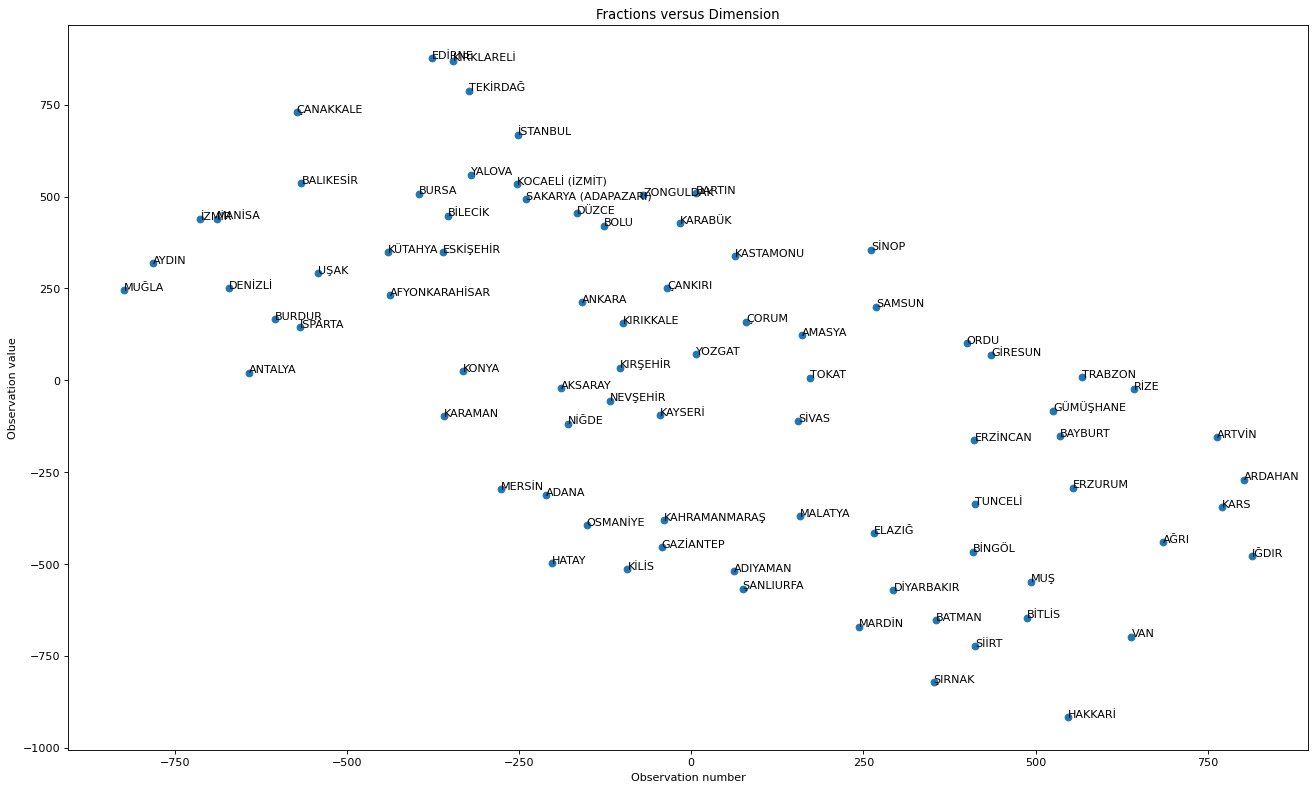

In [21]:
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot(111)
ax.scatter(-reconstructed_map[:,0],
          reconstructed_map[:,1])
ax.set(title= "Fractions versus Dimension",
      xlabel = "Observation number",
      ylabel = "Observation value")



for i in list(range(0,81)):
    ax.annotate(map_tr.columns[i], (-reconstructed_map[i,0], reconstructed_map[i,1]),size = 10)

plt.show()

Although locations of cities are somewhat different, this map looks like the Turkey Map.

## Task 3 – Dimensionality reduction for time series data

#### a)
We want to have a dataset which is ready to be presented. So, we do some manipulations

In [22]:
def manipulator(data):
    data.rename(columns = {0:"class"},inplace = True)
    data.sort_values(by = "class",inplace = True)
    data["id"] = list(range(1,897))
    long_data = pd.melt(data, id_vars=['id',"class"])
    long_data = long_data.rename(columns = {"variable":"time"})
    long_data = long_data.sort_values(by = ["id","time"]).reset_index(drop = True)
    return long_data

In [23]:
gest_x = pd.read_csv("C:/Users/a_kok/Desktop/Dersler/IE 582/HW2/uWaveGestureLibrary_X_TRAIN",header=None, sep=" ",
                             prefix="", skipinitialspace=True)
gest_y = pd.read_csv("C:/Users/a_kok/Desktop/Dersler/IE 582/HW2/uWaveGestureLibrary_Y_TRAIN",header=None, sep=" ",
                             prefix="", skipinitialspace=True)
gest_z = pd.read_csv("C:/Users/a_kok/Desktop/Dersler/IE 582/HW2/uWaveGestureLibrary_Z_TRAIN",header=None, sep=" ",
                             prefix="", skipinitialspace=True)

In [24]:
gest_x.head()

,0,1,2,3,4,5,6,7,8,9,...,306,307,308,309,310,311,312,313,314,315
0,6.0,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,...,-0.796414,-0.741728,-0.694698,-0.647669,-0.647669,-0.647669,-0.647669,-0.647669,-0.647669,-0.647669
1,5.0,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,...,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634
2,5.0,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,...,-0.282011,-0.236929,-0.191848,-0.146766,-0.101685,-0.061203,-0.056638,-0.055462,-0.055462,-0.055462
3,3.0,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,...,1.207290,1.147822,1.094344,1.060362,1.053158,1.044467,1.018981,0.909949,0.791013,0.672077
4,4.0,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,...,-1.436983,-1.436983,-1.436983,-1.436983,-1.436983,-1.440343,-1.452513,-1.468446,-1.484379,-1.500312


In [25]:
long_gest_x = manipulator(gest_x)
long_gest_y = manipulator(gest_y)
long_gest_z = manipulator(gest_z)

In [26]:
long_gest = long_gest_x.copy()
long_gest.rename(columns = {"value":"accelaration_x"},inplace = True)
long_gest["accelaration_y"] = long_gest_y["value"]
long_gest["accelaration_z"] = long_gest_y["value"]

In [27]:
long_gest["velocity_x"] = long_gest["accelaration_x"].cumsum()
long_gest["velocity_y"] = long_gest["accelaration_y"].cumsum()
long_gest["velocity_z"] = long_gest["accelaration_z"].cumsum()

long_gest["location_x"] = long_gest["velocity_x"].cumsum()
long_gest["location_y"] = long_gest["velocity_y"].cumsum()
long_gest["location_z"] = long_gest["velocity_z"].cumsum()


Now the dataset is ready to be illustrated.

In [28]:
long_gest.head()

,id,class,time,accelaration_x,accelaration_y,accelaration_z,velocity_x,velocity_y,velocity_z,location_x,location_y,location_z
0,1,1.0,1,0.244291,-1.252598,-1.252598,0.244291,-1.252598,-1.252598,0.244291,-1.252598,-1.252598
1,1,1.0,2,0.244291,-1.252598,-1.252598,0.488581,-2.505197,-2.505197,0.732872,-3.757795,-3.757795
2,1,1.0,3,0.244291,-1.252598,-1.252598,0.732872,-3.757795,-3.757795,1.465743,-7.515590,-7.515590
3,1,1.0,4,0.244291,-1.252598,-1.252598,0.977162,-5.010393,-5.010393,2.442905,-12.525983,-12.525983
4,1,1.0,5,0.244291,-1.252598,-1.252598,1.221453,-6.262992,-6.262992,3.664358,-18.788975,-18.788975


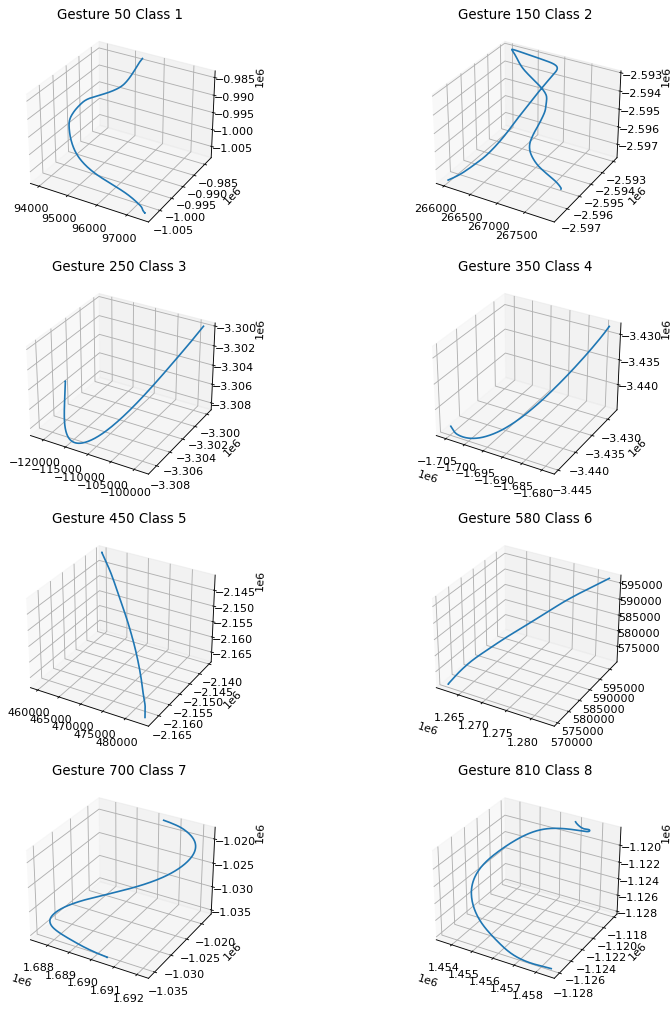

In [47]:
fig = plt.figure(figsize=(12, 16), dpi=80)

ax = fig.add_subplot(4, 2, 1, projection='3d')
x_data = long_gest[long_gest["id"] == 50]["location_x"]
y_data = long_gest[long_gest["id"] == 50]["location_y"]
z_data = long_gest[long_gest["id"] == 50]["location_z"]
plt.title("Gesture 50 Class 1")
ax.plot3D(x_data,y_data,z_data);

ax = fig.add_subplot(4, 2, 2, projection='3d')
x_data = long_gest[long_gest["id"] == 150]["location_x"]
y_data = long_gest[long_gest["id"] == 150]["location_y"]
z_data = long_gest[long_gest["id"] == 150]["location_z"]
plt.title("Gesture 150 Class 2")
ax.plot3D(x_data,y_data,z_data);

ax = fig.add_subplot(4, 2, 3, projection='3d')
x_data = long_gest[long_gest["id"] == 250]["location_x"]
y_data = long_gest[long_gest["id"] == 250]["location_y"]
z_data = long_gest[long_gest["id"] == 250]["location_z"]
plt.title("Gesture 250 Class 3")
ax.plot3D(x_data,y_data,z_data);

ax = fig.add_subplot(4, 2, 4, projection='3d')
x_data = long_gest[long_gest["id"] == 350]["location_x"]
y_data = long_gest[long_gest["id"] == 350]["location_y"]
z_data = long_gest[long_gest["id"] == 350]["location_z"]
plt.title("Gesture 350 Class 4")
ax.plot3D(x_data,y_data,z_data);

ax = fig.add_subplot(4, 2, 5, projection='3d')
x_data = long_gest[long_gest["id"] == 450]["location_x"]
y_data = long_gest[long_gest["id"] == 450]["location_y"]
z_data = long_gest[long_gest["id"] == 450]["location_z"]
plt.title("Gesture 450 Class 5")
ax.plot3D(x_data,y_data,z_data);

ax = fig.add_subplot(4, 2, 6, projection='3d')
x_data = long_gest[long_gest["id"] == 580]["location_x"]
y_data = long_gest[long_gest["id"] == 580]["location_y"]
z_data = long_gest[long_gest["id"] == 580]["location_z"]
plt.title("Gesture 580 Class 6")
ax.plot3D(x_data,y_data,z_data);

ax = fig.add_subplot(4, 2, 7, projection='3d')
x_data = long_gest[long_gest["id"] == 700]["location_x"]
y_data = long_gest[long_gest["id"] == 700]["location_y"]
z_data = long_gest[long_gest["id"] == 700]["location_z"]
plt.title("Gesture 700 Class 7")
ax.plot3D(x_data,y_data,z_data);

ax = fig.add_subplot(4, 2, 8, projection='3d')
x_data = long_gest[long_gest["id"] == 810]["location_x"]
y_data = long_gest[long_gest["id"] == 810]["location_y"]
z_data = long_gest[long_gest["id"] == 810]["location_z"]
plt.title("Gesture 810 Class 8")
ax.plot3D(x_data,y_data,z_data);


Gesture 50 Class 1 exactly looks like first class in Figure 1

Gesture 150 Class 2 does not look like any class in Figure 1

Gesture 250 Class 3 looks like class 1 in Figure 1.

Gesture 350 Class 4 looks like class 4 in Figure 1 but a bit curved.

Gesture 450 Class 5 looks like class 5 in Figure 1.

Gesture 580 Class 6 looks like class 6 in Figure 1.

Gesture 700 Class 7 does not look like any class in Figure 1.

Gesture 810 Class 8 looks like class 8 in Figure 1 but it is not a completed circle.

#### b)
Now we hava a dataset which is concatenated in a unusual way. We will use pca to this dataset.

In [30]:
gest_x = pd.read_csv("C:/Users/a_kok/Desktop/Dersler/IE 582/HW2/uWaveGestureLibrary_X_TRAIN",header=None, sep=" ",
                             prefix="x", skipinitialspace=True)
gest_y = pd.read_csv("C:/Users/a_kok/Desktop/Dersler/IE 582/HW2/uWaveGestureLibrary_Y_TRAIN",header=None, sep=" ",
                             prefix="y", skipinitialspace=True)
gest_z = pd.read_csv("C:/Users/a_kok/Desktop/Dersler/IE 582/HW2/uWaveGestureLibrary_Z_TRAIN",header=None, sep=" ",
                             prefix="z", skipinitialspace=True)

gest_concat = pd.concat([gest_x, gest_y,gest_z], axis=1)
gest_concat.drop(columns = ["y0","z0"],inplace = True)
gest_concat.rename(columns = {"x0":"class"},inplace = True)
gest_concat.head()

,class,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z306,z307,z308,z309,z310,z311,z312,z313,z314,z315
0,6.0,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,...,0.523217,0.513994,0.503481,0.492967,0.474522,0.456077,0.437632,0.419187,0.400743,0.382298
1,5.0,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,...,-0.427010,-0.427010,-0.427010,-0.427172,-0.428773,-0.440720,-0.452667,-0.464613,-0.476560,-0.488507
2,5.0,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,...,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717
3,3.0,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,...,-0.187384,-0.123549,-0.055870,0.011808,0.079487,0.157056,0.253740,0.445503,0.648538,0.851573
4,4.0,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,...,1.867473,1.834319,1.756000,1.638582,1.521164,1.453266,1.515219,1.632637,1.750054,1.867473


We use principal component analysis to each class seperately.

In [31]:
# Standardizing the features
x = StandardScaler().fit_transform(gest_concat[gest_concat["class"] == 1].iloc[:,1:946].T.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf_gest_class1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])

eigenvectors_class1 = pd.DataFrame(pca.components_,index = ["pc1","pc2"])
print("Cumulative Explained Variance Ration for Class 1",pca.explained_variance_ratio_.cumsum())

Cumulative Explained Variance Ration for Class 1 [0.52997902 0.63399109]


In [32]:
# Standardizing the features
x = StandardScaler().fit_transform(gest_concat[gest_concat["class"] == 2].iloc[:,1:946].T.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf_gest_class2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])

eigenvectors_class2 = pd.DataFrame(pca.components_,index = ["pc1","pc2"])
print("Cumulative Explained Variance Ration for Class 2",pca.explained_variance_ratio_.cumsum())

Cumulative Explained Variance Ration for Class 2 [0.52712574 0.68204014]


In [33]:
# Standardizing the features
x = StandardScaler().fit_transform(gest_concat[gest_concat["class"] == 3].iloc[:,1:946].T.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf_gest_class3 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])

eigenvectors_class3 = pd.DataFrame(pca.components_,index = ["pc1","pc2"])
print("Cumulative Explained Variance Ration for Class 3",pca.explained_variance_ratio_.cumsum())

Cumulative Explained Variance Ration for Class 3 [0.41132921 0.59491127]


In [34]:
# Standardizing the features
x = StandardScaler().fit_transform(gest_concat[gest_concat["class"] == 4].iloc[:,1:946].T.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf_gest_class4 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])

eigenvectors_class4 = pd.DataFrame(pca.components_,index = ["pc1","pc2"])
print("Cumulative Explained Variance Ration for Class 4",pca.explained_variance_ratio_.cumsum())

Cumulative Explained Variance Ration for Class 4 [0.41372499 0.54548333]


In [35]:
# Standardizing the features
x = StandardScaler().fit_transform(gest_concat[gest_concat["class"] == 5].iloc[:,1:946].T.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf_gest_class5 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])

eigenvectors_class5 = pd.DataFrame(pca.components_,index = ["pc1","pc2"])
print("Cumulative Explained Variance Ration for Class 5",pca.explained_variance_ratio_.cumsum())

Cumulative Explained Variance Ration for Class 5 [0.52631191 0.65352953]


In [36]:
# Standardizing the features
x = StandardScaler().fit_transform(gest_concat[gest_concat["class"] == 6].iloc[:,1:946].T.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf_gest_class6 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])

eigenvectors_class6 = pd.DataFrame(pca.components_,index = ["pc1","pc2"])
print("Cumulative Explained Variance Ration for Class 6",pca.explained_variance_ratio_.cumsum())

Cumulative Explained Variance Ration for Class 6 [0.42327801 0.53999268]


In [37]:
# Standardizing the features
x = StandardScaler().fit_transform(gest_concat[gest_concat["class"] == 7].iloc[:,1:946].T.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf_gest_class7 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])

eigenvectors_class7 = pd.DataFrame(pca.components_,index = ["pc1","pc2"])
print("Cumulative Explained Variance Ration for Class 7",pca.explained_variance_ratio_.cumsum())

Cumulative Explained Variance Ration for Class 7 [0.49705099 0.66086756]


In [38]:
# Standardizing the features
x = StandardScaler().fit_transform(gest_concat[gest_concat["class"] == 8].iloc[:,1:946].T.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf_gest_class8 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',"principal component 2"])

eigenvectors_class8 = pd.DataFrame(pca.components_,index = ["pc1","pc2"])
print("Cumulative Explained Variance Ration for Class 8",pca.explained_variance_ratio_.cumsum())

Cumulative Explained Variance Ration for Class 8 [0.4774311  0.74421892]


Cumulative explained variance ratios by first two principal components are shown above. Explained variance ratio is higher for class 2 and 8 while explained variance ratio is lower for class 4 and 6.

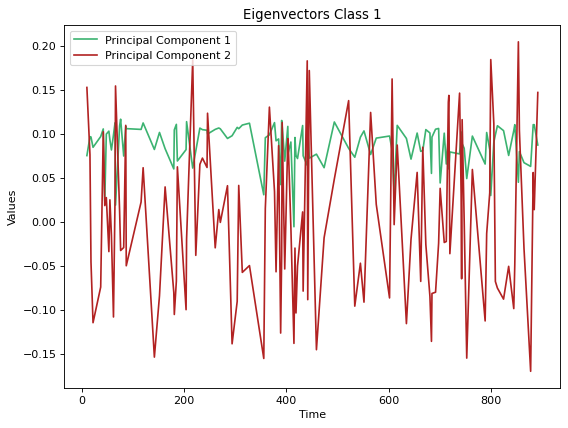

In [39]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(gest_concat[gest_concat["class"]==1].index,
          eigenvectors_class1.iloc[0],
          color = "mediumseagreen",
         label = "Principal Component 1")
ax.legend()
ax.plot(gest_concat[gest_concat["class"]==1].index,
          eigenvectors_class1.iloc[1],
          color = "firebrick",
          label = "Principal Component 2")
ax.legend()
ax.set(title= "Eigenvectors Class 1",
      xlabel = "Time",
      ylabel = "Values")

plt.show()

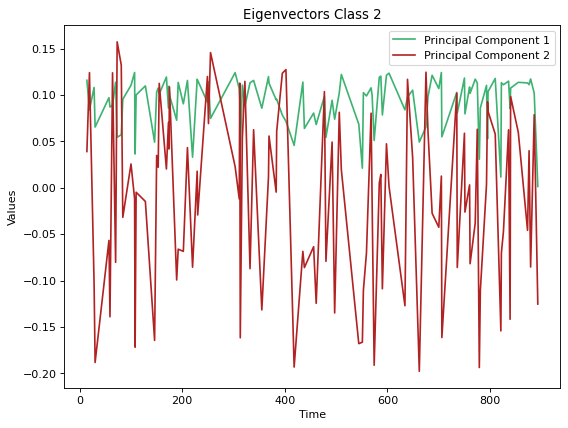

In [40]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(gest_concat[gest_concat["class"]==2].index,
          eigenvectors_class2.iloc[0],
          color = "mediumseagreen",
         label = "Principal Component 1")
ax.legend()
ax.plot(gest_concat[gest_concat["class"]==2].index,
          eigenvectors_class2.iloc[1],
          color = "firebrick",
          label = "Principal Component 2")
ax.legend()
ax.set(title= "Eigenvectors Class 2",
      xlabel = "Time",
      ylabel = "Values")

plt.show()

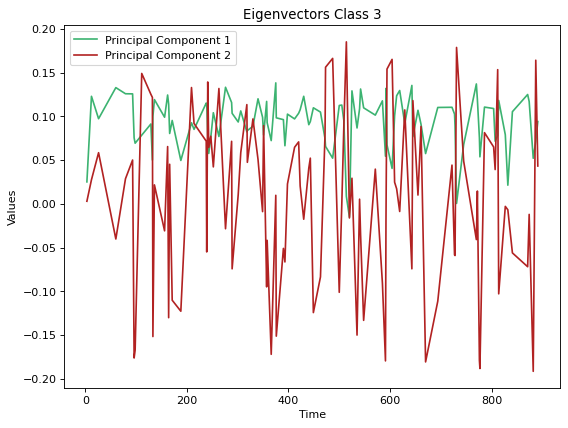

In [41]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(gest_concat[gest_concat["class"]==3].index,
          eigenvectors_class3.iloc[0],
          color = "mediumseagreen",
         label = "Principal Component 1")
ax.legend()
ax.plot(gest_concat[gest_concat["class"]==3].index,
          eigenvectors_class3.iloc[1],
          color = "firebrick",
          label = "Principal Component 2")
ax.legend()
ax.set(title= "Eigenvectors Class 3",
      xlabel = "Time",
      ylabel = "Values")

plt.show()

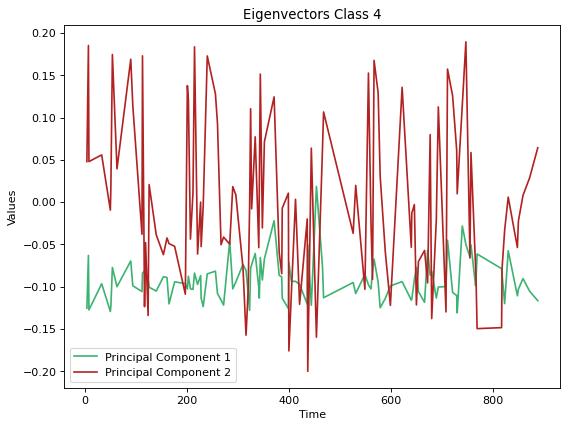

In [42]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(gest_concat[gest_concat["class"]==4].index,
          eigenvectors_class4.iloc[0],
          color = "mediumseagreen",
         label = "Principal Component 1")
ax.legend()
ax.plot(gest_concat[gest_concat["class"]==4].index,
          eigenvectors_class4.iloc[1],
          color = "firebrick",
          label = "Principal Component 2")
ax.legend()
ax.set(title= "Eigenvectors Class 4",
      xlabel = "Time",
      ylabel = "Values")

plt.show()

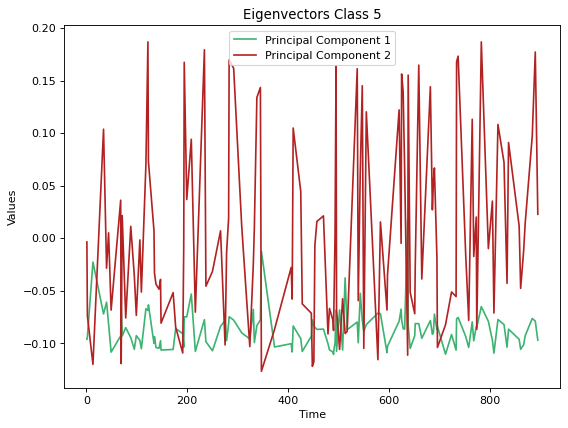

In [43]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(gest_concat[gest_concat["class"]==5].index,
          eigenvectors_class5.iloc[0],
          color = "mediumseagreen",
         label = "Principal Component 1")
ax.legend()
ax.plot(gest_concat[gest_concat["class"]==5].index,
          eigenvectors_class5.iloc[1],
          color = "firebrick",
          label = "Principal Component 2")
ax.legend()
ax.set(title= "Eigenvectors Class 5",
      xlabel = "Time",
      ylabel = "Values")

plt.show()

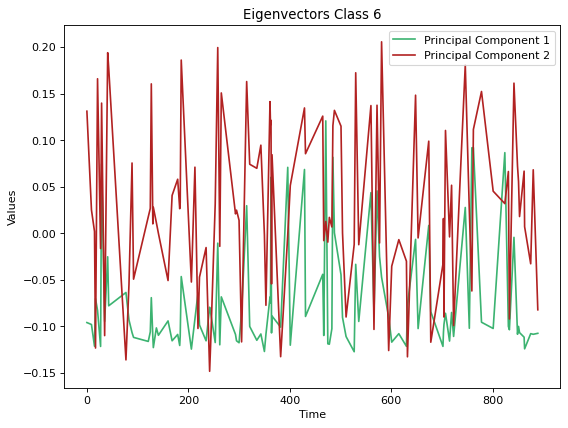

In [44]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(gest_concat[gest_concat["class"]==6].index,
          eigenvectors_class6.iloc[0],
          color = "mediumseagreen",
         label = "Principal Component 1")
ax.legend()
ax.plot(gest_concat[gest_concat["class"]==6].index,
          eigenvectors_class6.iloc[1],
          color = "firebrick",
          label = "Principal Component 2")
ax.legend()
ax.set(title= "Eigenvectors Class 6",
      xlabel = "Time",
      ylabel = "Values")

plt.show()

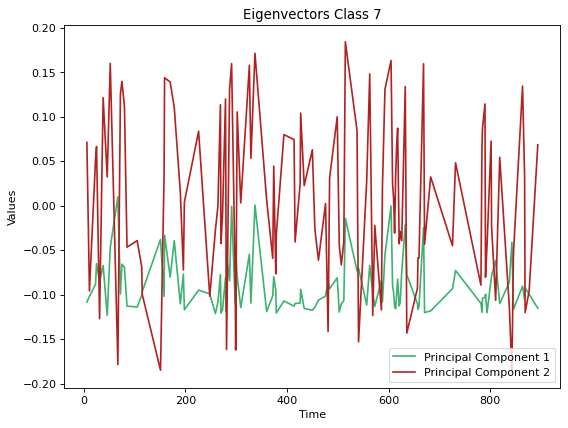

In [45]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(gest_concat[gest_concat["class"]==7].index,
          eigenvectors_class7.iloc[0],
          color = "mediumseagreen",
         label = "Principal Component 1")
ax.legend()
ax.plot(gest_concat[gest_concat["class"]==7].index,
          eigenvectors_class7.iloc[1],
          color = "firebrick",
          label = "Principal Component 2")
ax.legend()
ax.set(title= "Eigenvectors Class 7",
      xlabel = "Time",
      ylabel = "Values")

plt.show()

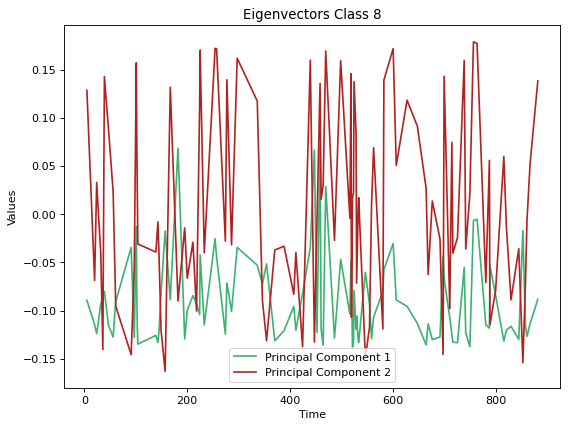

In [46]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(gest_concat[gest_concat["class"]==8].index,
          eigenvectors_class8.iloc[0],
          color = "mediumseagreen",
         label = "Principal Component 1")
ax.legend()
ax.plot(gest_concat[gest_concat["class"]==8].index,
          eigenvectors_class8.iloc[1],
          color = "firebrick",
          label = "Principal Component 2")
ax.legend()
ax.set(title= "Eigenvectors Class 8",
      xlabel = "Time",
      ylabel = "Values")

plt.show()

Eigenvectors give us the direction of corresponding principal component axes.

Because we concatenated the features, both eigenvectors change continously. Eigenvectors of principal component 2 have higher changes in values than eigenvectors of principal component 1 because principal component 1 have the higher eigenvalues which means that principal component 1 have the most of the variation.

## Conclusion
Principal component analysis and multidimensional scaling are useful techniques in dimensionality reduction. They provide us some information while having less dimensions. I think, one needs to learn the concept of these techniques well to understand the given information.